**Introduction**
For this story telling exercise I wanted to try playing with a fun data set.  I set this as being a general purpose presentation.

In this investigation, I'll be looking to answer some interesting questions like how movie genres popularity changed over time?

Do higher ratings translate to larger revenues?

How have movie budgets changed over time?

In [1]:
#importing the needed libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfMovies = pd.read_csv('tmdb_5000_movies.csv')
dfCredits = pd.read_csv('tmdb_5000_credits.csv')
dfMovieData = pd.read_csv('tmdb_movies_data.csv')

I did try two different data sets.  The two named with 5000 belonged to one kaggle competition the other one named tmdb_movies_data belonged to another competition.  I found this one to be more interesting so from here on I will be exploring dfMovieData.

In [3]:
dfMovieData.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
dfMovieData.shape

(10866, 21)

You can see from the graph below that there are movies being released as the years go on.  It is well below 500 in the 60s and 70s but starts to pick up in the 80s and after 2000 starts to grow exponentially.

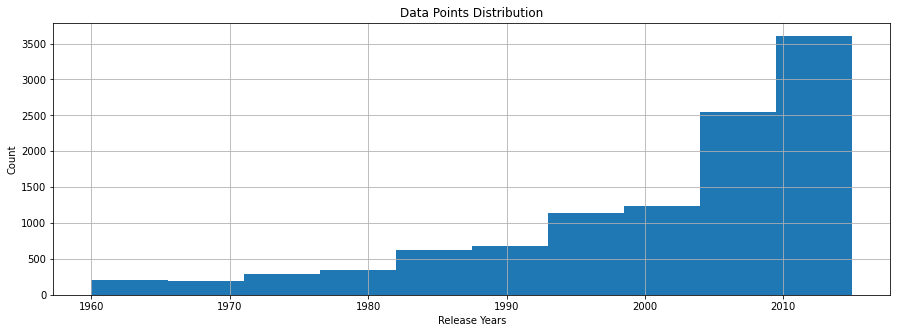

In [5]:
ax = dfMovieData.release_year.hist(figsize=(15,5));
ax.set_xlabel('Release Years')
ax.set_ylabel('Count')
ax.set_title('Data Points Distribution');

In [6]:
dfMovieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#null values
dfMovieData.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The distribution of null values matches the distribution of the data points over the years. Dropping null values should be a good way to clean the data.

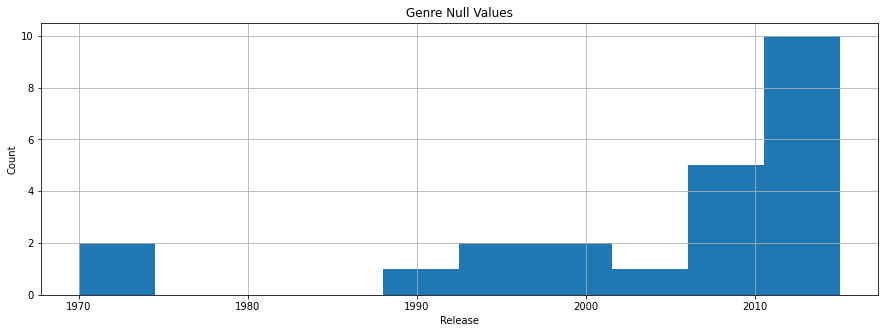

In [8]:
ax = dfMovieData[dfMovieData.genres.isnull()].release_year.hist(figsize=(15,5));
ax.set_xlabel('Release')
ax.set_ylabel('Count')
ax.set_title('Genre Null Values');

In [9]:
dfMovieData.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#find data with 0 revenue and buget
df_zeroes = dfMovieData.query('revenue_adj == 0 & budget_adj == 0') 
df_zeroes.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/2015,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,skyscraper|high rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/2015,161,5.4,2015,0.0,0.0


In [11]:
#look for duplicates
dfMovieData.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [12]:
#list all columns
dfMovieData.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
#dropping the columns not planning on using
dfMovieData.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies','release_date','vote_count'],axis=1, inplace=True)

In [14]:
#dop the duplicates
dfMovieData.drop_duplicates(inplace=True)

In [15]:
#change release_year to a string
dfMovieData.release_year = dfMovieData.release_year.astype(str)

In [16]:
#drop missing values
dfMovieData.dropna(inplace=True)

In [17]:
#drop the rows with revenue_adj and budget_adj equal to zero
df_zeroes = dfMovieData.query('revenue_adj == 0 & budget_adj == 0')
dfMovieData.drop(df_zeroes.index,inplace=True)

In [18]:
dfMovieData.genres.value_counts()

Drama                                    403
Comedy                                   360
Drama|Romance                            190
Comedy|Romance                           171
Comedy|Drama                             154
                                        ... 
Drama|Action|History|Thriller              1
Comedy|Drama|Romance|Science Fiction       1
Horror|Western|Adventure|Drama             1
Fantasy|Animation|Comedy|Crime|Family      1
Mystery|Drama|Crime|Thriller               1
Name: genres, Length: 1412, dtype: int64

In [19]:
#split genres into rows in a separate data frame
df_gen = pd.DataFrame(data = dfMovieData.genres.str.split('|').tolist(),\
                    index=[dfMovieData.release_year,dfMovieData.popularity]).stack() 
df_gen = df_gen.reset_index([0,1])
#rename genres column
df_gen.rename(mapper={0:'genres'},axis=1,inplace=True)  
df_gen.head()

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller
0,2015,28.419936,Action


In [20]:
#Count of unique values in genres
df_gen.genres.nunique() 

20

You can see in the graph below that some genres occur more frequently.  Drama and comedies seem to be more popular, while foreign movies and westerns are less popular.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


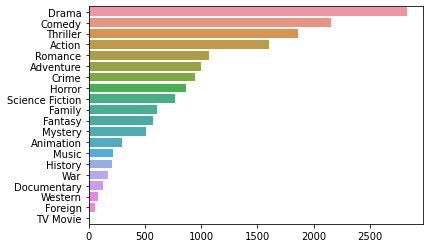

In [21]:
x = df_gen.genres.value_counts().index
y = df_gen.genres.value_counts().values

sns.barplot(y,x,orient='h');

In [22]:
#divide into decades
df_gen.release_year=df_gen.release_year.apply(lambda x: x[:3]+'0') 
#creating data frame grouped by decades and genres
df_gen_pop=pd.DataFrame(df_gen.groupby(['release_year','genres']\
                                       ,as_index=False).popularity.sum()) 
df_gen_pop.tail(25)

,release_year,genres,popularity
91,2000,Science Fiction,267.428377
92,2000,TV Movie,2.532275
93,2000,Thriller,574.114141
94,2000,War,59.802179
95,2000,Western,13.576707
96,2010,Action,811.890600
97,2010,Adventure,643.323797
98,2010,Animation,160.140701
99,2010,Comedy,590.192408
100,2010,Crime,296.418902


You can see in the graphs below that genres move only slightly in popularity.  For instance most often drama and comedy are quite high in popularity, the one exception being in the 1970s.  Also foreign films and western are always somewhere in the bottom five.

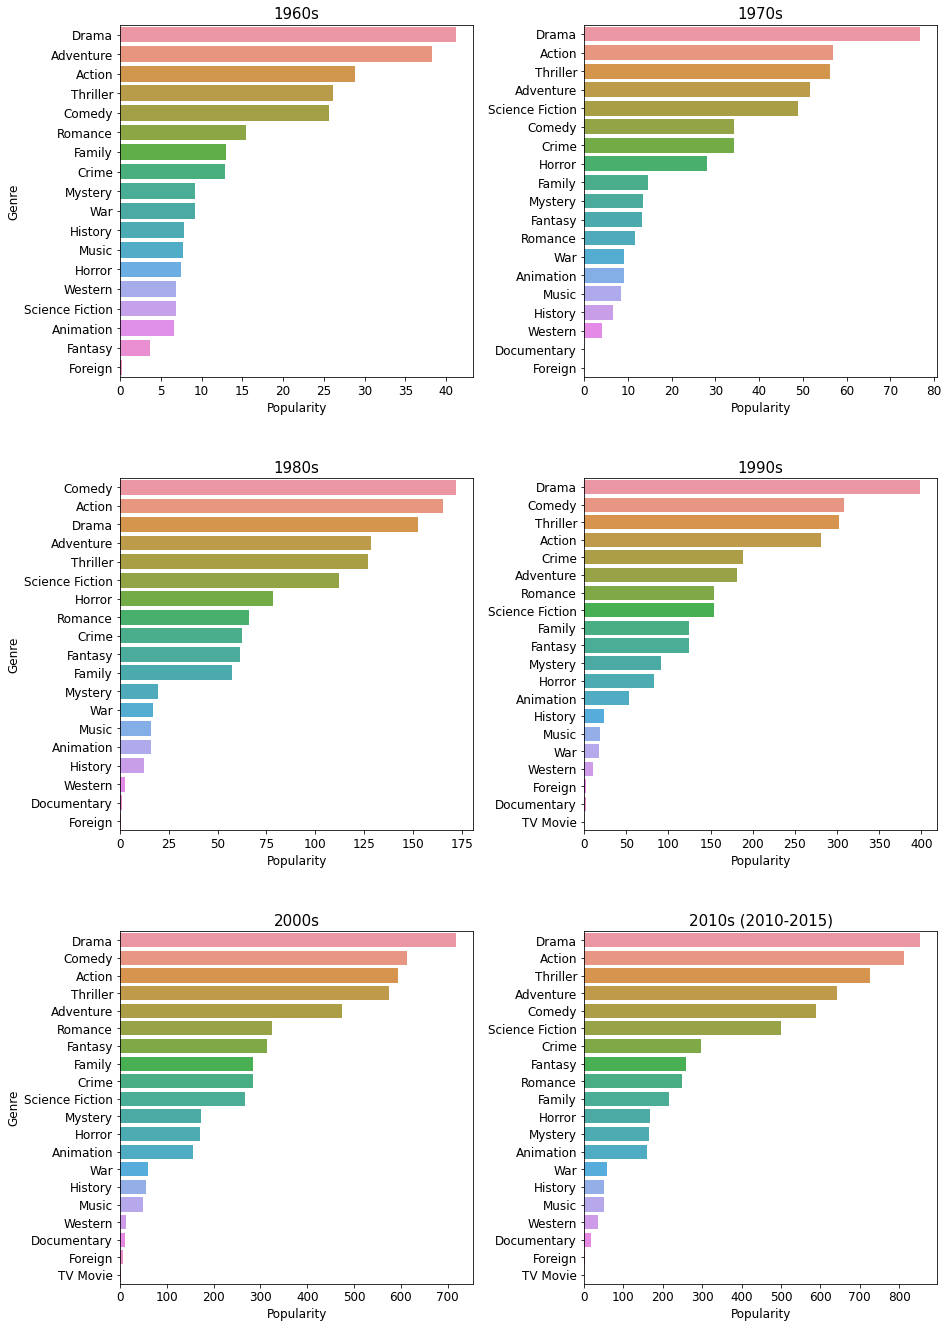

In [24]:
# Plotting Genres Popularities in Every Decade: 
#Used this link to help me in making the subplots: https://bit.ly/3eZMUPD

df_gen1=df_gen_pop.query("release_year== '1960'")
df_gen2=df_gen_pop.query("release_year== '1970'")
df_gen3=df_gen_pop.query("release_year== '1980'")
df_gen4=df_gen_pop.query("release_year== '1990'")
df_gen5=df_gen_pop.query("release_year== '2000'")
df_gen6=df_gen_pop.query("release_year== '2010'")

df_list=[df_gen1, df_gen2, df_gen3, df_gen4, df_gen5, df_gen6]


fig, axes = plt.subplots(3, 2,figsize=(14,20))
fig.tight_layout(pad=8)
count=0
for row in range(3):
    for col in range(2):
        ax=sns.barplot( x='popularity',y='genres',data=df_list[count],orient='h',ax=axes[row,col],\
                       order=df_list[count].sort_values('popularity',ascending=False).genres)
        
        if df_list[count].release_year.unique()[0] != '2010':
            ax.set_title(df_list[count].release_year.unique()[0] + "s",size=15)
        else:
            ax.set_title(df_list[count].release_year.unique()[0] + "s"+ " (2010-2015)",size=15)
            
        if col != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Genre", size=12)
            
        ax.set_xlabel('Popularity',size=12)
        ax.tick_params(labelsize=12)
        count+=1

Popularity grows in every decade.

Drama is the most popular genre in all decades except in 1980s at which Comedy has peaked before its popularity started to decline.

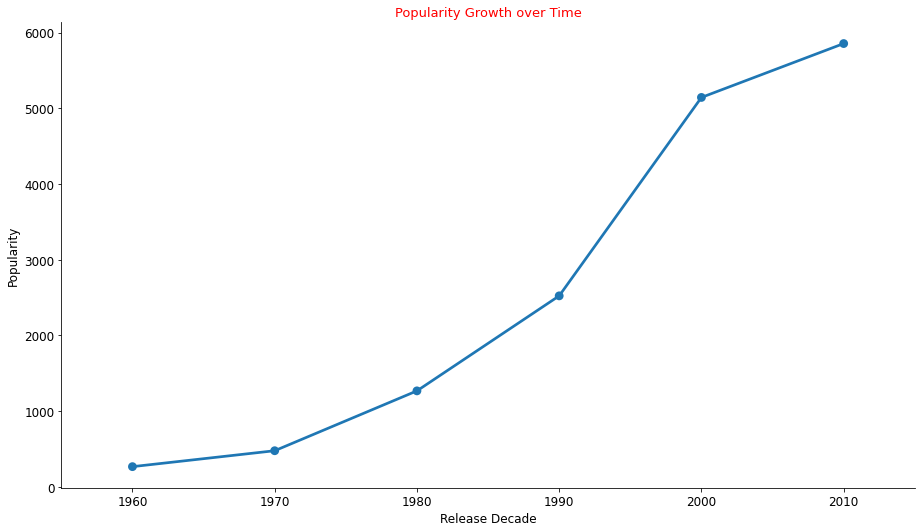

In [25]:
# Plotting Popularity over time
df_decade_pop=pd.DataFrame(df_gen_pop.groupby('release_year',as_index=False)\
                           .popularity.sum()) #Creating data frame for total popularity each decade


sns.catplot(x='release_year', y='popularity', data= df_decade_pop,height=7,aspect=1.8, kind='point');
plt.xlabel('Release Decade',size=12);
plt.ylabel('Popularity',size=12);
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Popularity Growth over Time',size=13,color='r');

In [26]:
#check ratings
dfMovieData.vote_average.min(), dfMovieData.vote_average.mean(),dfMovieData.vote_average.max() 

(1.5, 6.039656011682606, 8.4)

Ratings distribution is slightly left-skewed and ranging between 1.5 and 8.4 with mean value around 6.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


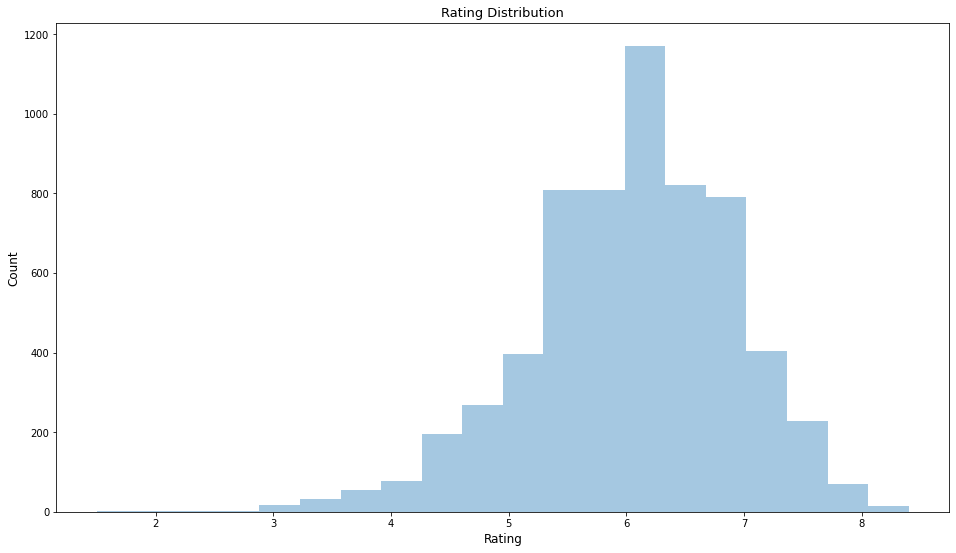

In [37]:
plt.figure(figsize=(16,9))
ax=sns.distplot(dfMovieData.vote_average,bins=20,kde=False);
ax.set_xlabel('Rating',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Rating Distribution',size=13);

In [27]:
#check revenue
dfMovieData.revenue_adj.min(), dfMovieData.revenue_adj.mean()/1e6,dfMovieData.revenue_adj.max()/1e6

(0.0, 90.56047446193216, 2827.12375)

Only the top quartile are making revenue beyond the mean.  It looks like this means that only smaller percentage of movies are what would be termed blockbusters.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


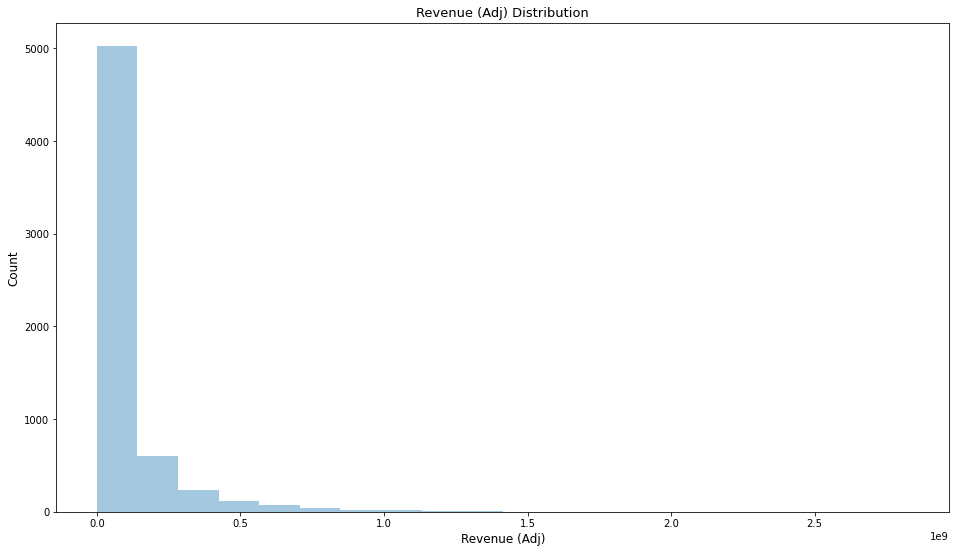

In [29]:
plt.figure(figsize=(16,9))
ax = sns.distplot(dfMovieData.revenue_adj,bins=20,kde=False);
ax.set_xlabel('Revenue (Adj)',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Revenue (Adj) Distribution',size=13);

In [30]:
#twemty-six percent of movies with revenues more than mean
round((dfMovieData.query('revenue_adj > revenue_adj.mean()').revenue_adj.count()\
       /dfMovieData.revenue_adj.count())*100,0)    

26.0

The figures below display a  weak linear relationship between ratings and revenue. There are a lot of outliers at each rating, seen specifically nearer the high ratings, and this can be expected since we've found earlier that revenue distribution is slightly skewed to the left which means that movies with high revenues are basically rare in our data.

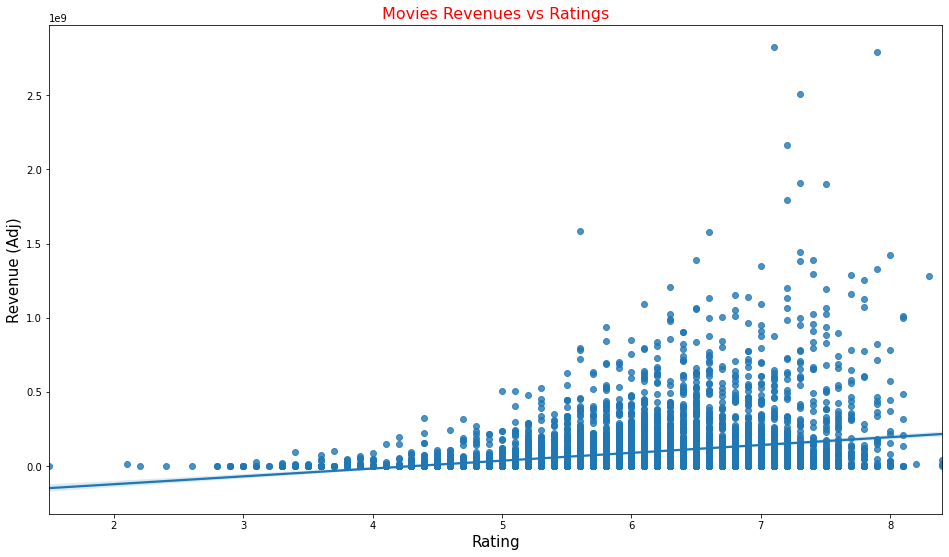

In [31]:
plt.figure(figsize=(16,9))
sns.regplot(data=dfMovieData,x='vote_average',y='revenue_adj')
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Movies Revenues vs Ratings',size=16,color='r');

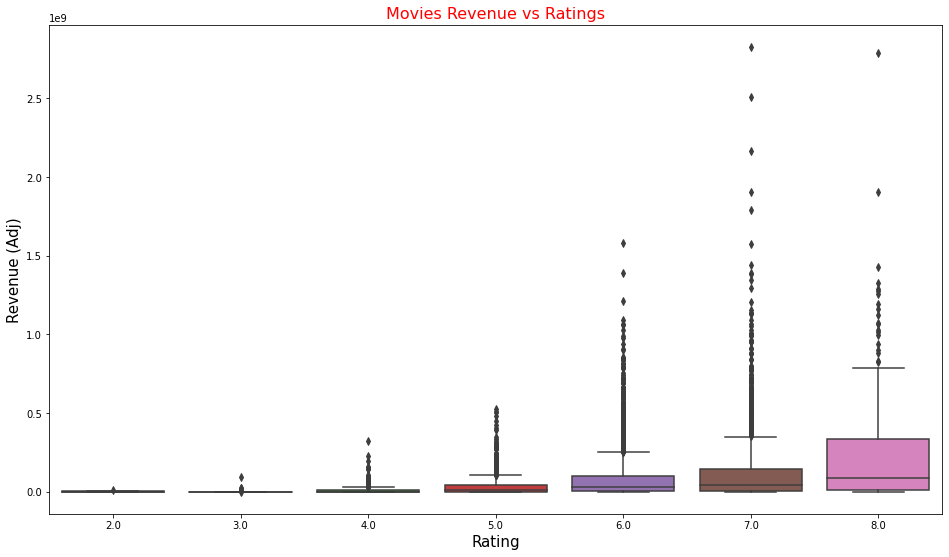

In [32]:
plt.figure(figsize=(16,9))
sns.boxplot(data=dfMovieData,x=dfMovieData.vote_average.apply(lambda x: round(x,0))\
            ,y='revenue_adj')      #rounding ratings to nearest number and plot against revenue
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Movies Revenue vs Ratings',size=16,color='r');

It looks like there is a correlation of higher ratings and bigger revenues.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


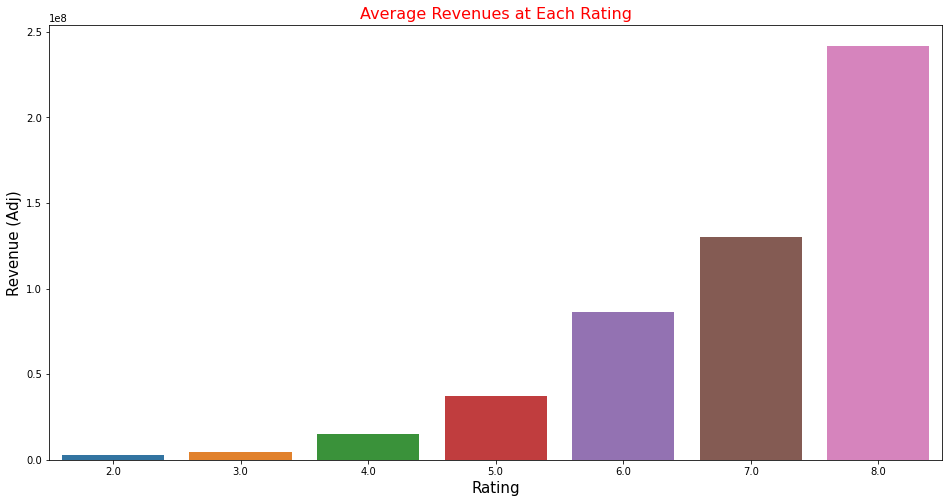

In [33]:
df_vote = dfMovieData.copy() 
df_vote.vote_average = dfMovieData.vote_average.apply(lambda x: round(x,0)) 
df_vote_rev = df_vote.groupby('vote_average').revenue_adj.mean() #Ratings rounded to nearest number and average revenue for each

plt.figure(figsize=(16,8))
sns.barplot(df_vote_rev.index,df_vote_rev.values)
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Average Revenues at Each Rating',size=16,color='r');

The chart below shows ups and downs then a growth in spending starting around 1970s.

Budget distribution is extremely left-skewed meaning that very few movies have such high budgets.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


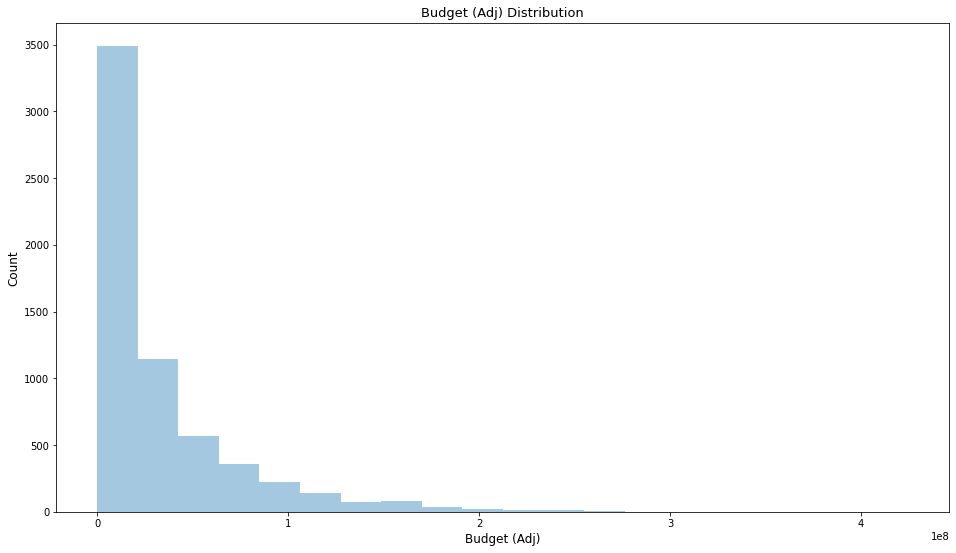

In [36]:
plt.figure(figsize=(16,9))
ax=sns.distplot(dfMovieData.budget_adj,bins=20,kde=False);
ax.set_xlabel('Budget (Adj)',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Budget (Adj) Distribution',size=13);

The chart below shows ups and downs then a growth in spending starting around 1970s.

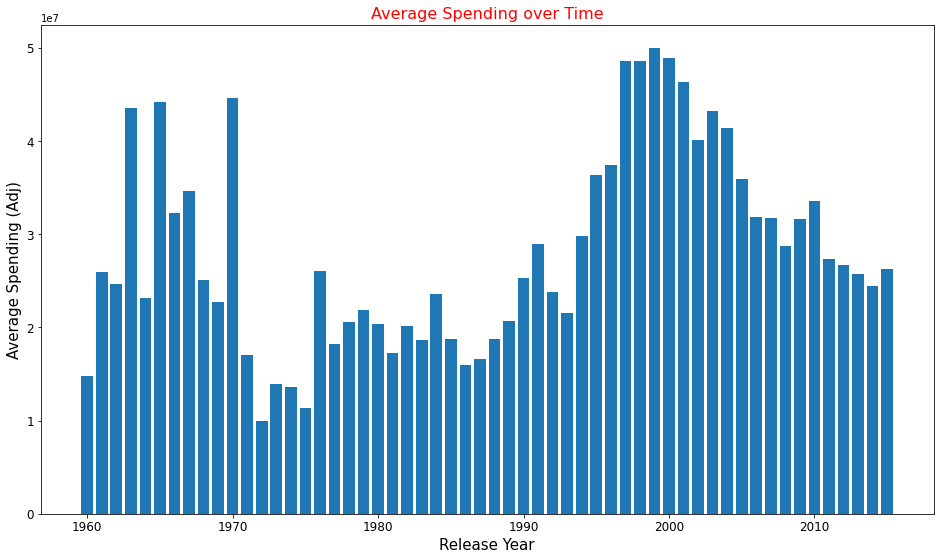

In [38]:
df_bud = dfMovieData.groupby('release_year').budget_adj.mean()

plt.figure(figsize=(16,9))
plt.bar(x=df_bud.index.astype(int),height=df_bud.values);
plt.xlabel('Release Year',size=15)
plt.xticks(size=12)
plt.ylabel('Average Spending (Adj)',size=15)
plt.yticks(size=12)
plt.title('Average Spending over Time',size=16,color='r');

**Conclusions**

This analysis was made to develop a sense of how the data is distributed and the relationships between variables. To summarize the findings in those few points:

Movies popularity in general is increasing over time. As popularity increases the most popular genres are nearly the same every decade with Drama on the top. It seems movie goes tend to prefer Drama, Comedy, Thriller, Adventure, and Action in that order.

Movie revenue has a weak linear relationship with rating. With that said,  the average revenues are larger in the movies with higher ratings.

Movie budgets are not related to time. There are movies with budgets in every range every year, but average spending in general started to increase in the 1970s.